# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import LabelEncoder

# Data Structure and Content

In [2]:
df_train= pd.read_csv(r'D:\cert , cv , interns\technocolabs\main project\prosperLoanData.csv')

In [ ]:
pd.set_option('display.max_rows', None)
df_train.head()

# Removing Irrelevant Columns

In [3]:
df_train=df_train.drop(['ListingKey','ListingNumber','GroupKey','LoanNumber','LoanKey','MemberKey'],axis=1)

In [ ]:
pd.set_option('display.max_rows', None)
df_train.head()

# Removing Duplicated Entries

In [4]:
df_train.drop_duplicates(inplace=True)

# EDA

In [ ]:
df_train.describe()

In [ ]:
df_train.info()

# Handling Missing Values

In [ ]:
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

## plotting missing values

In [ ]:
klib.missingval_plot(df_train)

## ->From the plot we can deduce that the column that has highest missing values is LoanFirstDefaultedCycleNumber

## Filling Null Values

In [5]:
from sklearn.impute import SimpleImputer

num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df_train[num_cols] = imputer.fit_transform(df_train[num_cols])
cat_cols = df_train.select_dtypes(include=['category','object']).columns
cat_cols= cat_cols.drop('ClosedDate')
imputer2 = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df_train[cat_cols] = imputer2.fit_transform(df_train[cat_cols])

In [ ]:
# # Fill null values in numerical columns with the mean
# num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
# df_train[num_cols] = df_train[num_cols].fillna(df_train[num_cols].mean())

# # Fill null values in categorical columns with the mode
# cat_cols = df_train.select_dtypes(include=['category','object']).columns
# cat_cols= cat_cols.drop('ClosedDate')
# df_train[cat_cols] = df_train[cat_cols].fillna(df_train[cat_cols].mode().iloc[0])

In [ ]:
pd.set_option('display.max_rows', 500)
df_train.isnull().sum()

## splitting two data sets because we have two target variables

In [6]:
df_train2= df_train.copy()

## Converting Loan Status to Binary

In [ ]:
df_train2

In [7]:
df_train2 = df_train2[df_train2['LoanStatus'] != 'Current']

In [8]:
df_train2['ClosedDate'].isnull().sum()

2272

In [9]:
df_train2['LoanStatusBinary']= np.where(df_train2['ClosedDate'].isnull()==False,1,-1)

In [10]:
df_train2['LoanStatusBinary']

0         1
2         1
11        1
12       -1
15        1
         ..
113927    1
113928    1
113929    1
113933   -1
113935    1
Name: LoanStatusBinary, Length: 57361, dtype: int32

In [11]:
count_zeros = (df_train2['LoanStatusBinary'] == -1).sum()
print("non defaulted",count_zeros)

non defaulted 2272


In [12]:
df_filtered = df_train2[df_train2['LoanStatusBinary']==-1]
pd.set_option('display.max_rows', None)


# concatenate the columns side by side
concatenated = pd.concat([df_filtered['LoanStatusBinary'],df_filtered['LoanStatus']],axis=1)
concatenated['LoanStatus'].unique()

array(['Past Due (1-15 days)', 'Past Due (16-30 days)',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [13]:
for d in df_train2['LoanStatusBinary']:
        if d==-1:
            df_train2['LoanStatusBinary']=np.where(df_train2['LoanCurrentDaysDelinquent'] > 180, 1, 0)
df_train2['LoanStatusBinary']

In [14]:
df_filtered = df_train2[df_train2['LoanStatusBinary']==1]
pd.set_option('display.max_rows', None)


# concatenate the columns side by side
concatenated = pd.concat([df_filtered['LoanStatusBinary'],df_filtered['LoanStatus']],axis=1)
concatenated

In [15]:
concatenated['LoanStatus'].unique()

array(['Chargedoff', 'Defaulted'], dtype=object)

In [16]:
pd.set_option('display.max_rows', None)
# concatenate the columns side by side
concatenated = pd.concat([df_train2['LoanStatusBinary'],df_train2['LoanCurrentDaysDelinquent']],axis=1)
concatenated

In [17]:
count_ones = (df_train2['LoanStatusBinary'] == 1).sum()
print("defaulted",count_ones)

defaulted 15063


In [18]:
count_zeros = (df_train2['LoanStatusBinary'] == 0).sum()
print("non defaulted",count_zeros)

non defaulted 42298


# Convert Data Types to reduce memory

In [19]:
df_train=klib.convert_datatypes(df_train)

In [ ]:
df_train.info()

In [ ]:
import dtale

In [ ]:
dtale.show(df_train)

# Bar plots for all categorical variables

In [ ]:
plt.figure(figsize=(20,20))
df_train['BorrowerState'].value_counts().plot.bar()
plt.xlabel('BorrowerState', fontsize=20)

In [ ]:
plt.figure(figsize=(20,20))
df_train['Occupation'].value_counts().plot.bar()
plt.xlabel('Occupation', fontsize=20)

In [ ]:
plt.figure(figsize=(10,10))
df_train['EmploymentStatus'].value_counts().plot.bar()
plt.xlabel('EmploymentStatus', fontsize=20)

In [ ]:
 plt.figure(figsize=(10,10))
df_train['LoanOriginationQuarter'].value_counts().plot.bar()
plt.xlabel('LoanOriginationQuarter', fontsize=20)  

In [ ]:
plt.figure(figsize=(10,10))
df_train['IncomeRange'].value_counts().plot.bar()
plt.xlabel('IncomeRange', fontsize=20)  

# Histogram for our first Target Variable

In [ ]:
#histogram for numerc columns 
plt.hist(df_train['BorrowerRate'])
plt.title("BorrowerRate")
plt.show()

# Scatter Plots

In [ ]:
num = df_train.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df_train[num]

In [ ]:
for numeric in BM_num:
    plt.figure(figsize=(20,20))
    plt.scatter(BM_num[numeric], BM_num['BorrowerRate'])
    plt.title(numeric)
    plt.ylabel('BorrowerRate')
    plt.show()

# category Plots of loanStatus target Variable

In [ ]:
num = df_train2.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df_train2[num]
for numeric in BM_num:
    plt.figure(figsize=(20,20))
    sns.catplot(x=numeric, y='LoanStatus', data=df_train2)
    plt.title(numeric)
    plt.ylabel('LoanStatus')
    plt.show()




## Research Question 1 : What are the most number of borrowers Credit Grade?

In [ ]:
df_train['CreditGrade'].describe()

In [ ]:
plt.figure(figsize=(10,5))
df_train['CreditGrade'].value_counts().plot.bar()
plt.xlabel('CreditGrade', fontsize=20)  

# ->highest is c

# Research Question 2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

In [ ]:
df_train['LoanStatus'].value_counts().plot.bar()
plt.xlabel('LoanStatus', fontsize=20)

## ->no, pastDue has low values

# Research Question 3 : What is the highest number of BorrowerRate?

In [ ]:
df_train['BorrowerRate'].describe()

In [ ]:
#histogram for numerc columns 
plt.hist(df_train['BorrowerRate'])
plt.title("BorrowerRate")
plt.show()

## -> Highest number is between 0.1 and 0.2

# Research Question 4 : Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

In [ ]:
plt.hist(df_train['LenderYield'])
plt.title("LenderYield")
plt.show()

## ->Yes ,The highest number of Lender Yield is between 0.1 and 0.2

# Research Question 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

In [ ]:
sns.barplot(x='CreditGrade', y='MonthlyLoanPayment', data=df_train)

In [ ]:
le = LabelEncoder()
df_train['CreditGrade']=le.fit_transform(df_train['CreditGrade'])

## -> yes, Higher Credit Grade lead to higher monthly loan payment 

# Research Question 6 : Here we look at the Completed Loan Status and Defaulted Rate to determine the accuracy of Credit Grade.

In [ ]:
sns.catplot(x='CreditGrade', y='LoanStatus', data=df_train, kind='bar')

# ->credit grade seems to be accurate because defaulted borrowers have lower credit grade ('D') than completed 

# Research Question 7 : Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness. Now we need to understand does the ProsperScore, the custom built risk assesment system is being used in determing borrower’s rate?
## From a theoretical standpoint, if the higher ProsperScore leads to lower Borrower Rate and Borrower Annual Percentage Rate that means the Prosper Score is being used alongside the Credit Grade in determing a person’s creditworthiness. -->

In [ ]:
plt.scatter(df_train['BorrowerAPR'], df_train['BorrowerRate'])
plt.ylabel('BorrowerRate')
plt.show()

In [ ]:
plt.scatter(df_train['BorrowerRate'], df_train['ProsperScore'])
plt.ylabel('ProsperScore')
plt.show()

In [ ]:
df_train['BorrowerRate'].corr(df_train['ProsperScore'])

In [ ]:
plt.scatter(df_train['BorrowerAPR'], df_train['ProsperScore'])
plt.ylabel('ProsperScore')
plt.show()

In [ ]:
df_train['BorrowerAPR'].corr(df_train['ProsperScore'])






## -> Borrower APR and BorrowerRate are directly correlated but Borrower APR and Prosper score are inversely correlated this means that when prosper score increases borrower apr decreases and borrower rate also increases

In [ ]:
df_train2.head()

In [20]:
df_train2=df_train2.drop('LoanStatus',axis=1)

In [21]:
df_train2['LoanStatus']=concatenated['LoanStatusBinary']
df_train2=df_train2.drop('LoanStatusBinary',axis=1)

In [22]:
df_train2.head()

,ListingCreationDate,CreditGrade,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatus
0,2007-08-26 19:09:29.263000000,C,36.0,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0.168661,0.080306,0.096068,...,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,258.0,0
2,2007-01-05 15:00:47.090000000,HR,36.0,2009-12-17 00:00:00,0.28269,0.2750,0.2400,0.168661,0.080306,0.096068,...,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,41.0,0
11,2007-10-09 20:28:33.640000000,C,36.0,2008-01-07 00:00:00,0.15033,0.1325,0.1225,0.168661,0.080306,0.096068,...,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,53.0,0
12,2013-12-15 20:01:10.757000000,C,36.0,NaN,0.17969,0.1435,0.1335,0.126400,0.052400,0.074000,...,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0
15,2012-04-10 09:14:46.297000000,C,36.0,2012-12-19 00:00:00,0.35797,0.3177,0.3077,0.289600,0.165000,0.124600,...,0.0,3790.25,3790.25,0.0,1.0,0.0,0.0,0.0,10.0,0


In [ ]:
df_train2['LoanStatus']

## Box plots


In [24]:
dfm = df_train.select_dtypes(exclude=['object','boolean','string'])

In [ ]:
for column in dfm:
    plt.figure()
    dfm.boxplot([column])

## Handling outliers

In [25]:
dfm = dfm.apply(lambda x: x.sort_values().values)
q1 = dfm.quantile(0.25)
q3 = dfm.quantile(0.75)
IQR = q3-q1

In [26]:
lwr_bound = abs(q1-(1.5*IQR))
upr_bound = (q3+(1.5*IQR))
# lwr_bound = lwr_bound.apply(lambda x: max(x, 0))
# upr_bound = upr_bound.apply(lambda x: max(x, 0))

In [ ]:
# outliers=[]
# for  (columnName, columnData) in dfm.iteritems():
#         if (any(columnData)>upr_bound[columnName]):
#                 outliers.append(columnName)
#                 df_train2[columnName]=np.where(df_train2[columnName]>upr_bound[columnName],upr_bound[columnName],df_train2[columnName])
#         if any(columnData)<lwr_bound[columnName]:
#                 outliers.append(columnName)
#                 df_train2[columnName]=np.where(df_train2[columnName]<lwr_bound[columnName],lwr_bound[columnName],df_train2[columnName])

# outliers

# Dropping all irrelevant columns after encoding target variable

In [ ]:
df_train2.head()

In [27]:
df_train=df_train.drop(['CurrentDelinquencies','LoanCurrentDaysDelinquent'],axis=1)

# Feature Engineering

## -Pearson correlation

In [28]:
df_train.corr().abs()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,1.000000,0.011183,0.020085,0.020556,0.054910,0.103128,0.146794,0.076214,0.027862,0.004947,...,0.167600,0.035841,0.038353,0.035981,0.034157,0.028806,0.056680,0.043507,0.024472,0.045137
BorrowerAPR,0.011183,1.000000,0.989587,0.989095,0.768688,0.814951,0.681695,0.825777,0.573565,0.132449,...,0.116966,0.041452,0.067300,0.067385,0.028519,0.028236,0.044236,0.046757,0.031841,0.307588
BorrowerRate,0.020085,0.989587,1.000000,0.999211,0.770676,0.813730,0.703866,0.820451,0.559305,0.102913,...,0.095993,0.053378,0.100635,0.100308,0.042059,0.029025,0.030579,0.037312,0.026512,0.274217
LenderYield,0.020556,0.989095,0.999211,1.000000,0.773858,0.817044,0.706711,0.823796,0.561618,0.104395,...,0.097854,0.052954,0.099506,0.099195,0.041025,0.029209,0.031069,0.037302,0.026632,0.274174
EstimatedEffectiveYield,0.054910,0.768688,0.770676,0.773858,1.000000,0.798135,0.801568,0.848394,0.632003,0.102219,...,0.049534,0.040812,0.086681,0.086343,0.018285,0.043319,0.022790,0.026012,0.013077,0.211067
EstimatedLoss,0.103128,0.814951,0.813730,0.817044,0.798135,1.000000,0.591056,0.964182,0.673727,0.093319,...,0.167755,0.036304,0.058030,0.057299,0.019044,0.022713,0.001992,0.003860,0.008418,0.219229
EstimatedReturn,0.146794,0.681695,0.703866,0.706711,0.801568,0.591056,1.000000,0.659980,0.383211,0.086910,...,0.115768,0.056200,0.122096,0.121056,0.027999,0.039379,0.009705,0.017527,0.010937,0.073477
ProsperRating (numeric),0.076214,0.825777,0.820451,0.823796,0.848394,0.964182,0.659980,1.000000,0.705221,0.089025,...,0.179535,0.034540,0.053542,0.052874,0.017468,0.012478,0.002329,0.003156,0.003586,0.244893
ProsperScore,0.027862,0.573565,0.559305,0.561618,0.632003,0.673727,0.383211,0.705221,1.000000,0.009157,...,0.196633,0.011959,0.015441,0.015430,0.006653,0.019323,0.013011,0.011547,0.001073,0.255111
ListingCategory (numeric),0.004947,0.132449,0.102913,0.104395,0.102219,0.093319,0.086910,0.089025,0.009157,1.000000,...,0.034189,0.019839,0.054002,0.053068,0.027700,0.011688,0.028031,0.018968,0.013096,0.073996


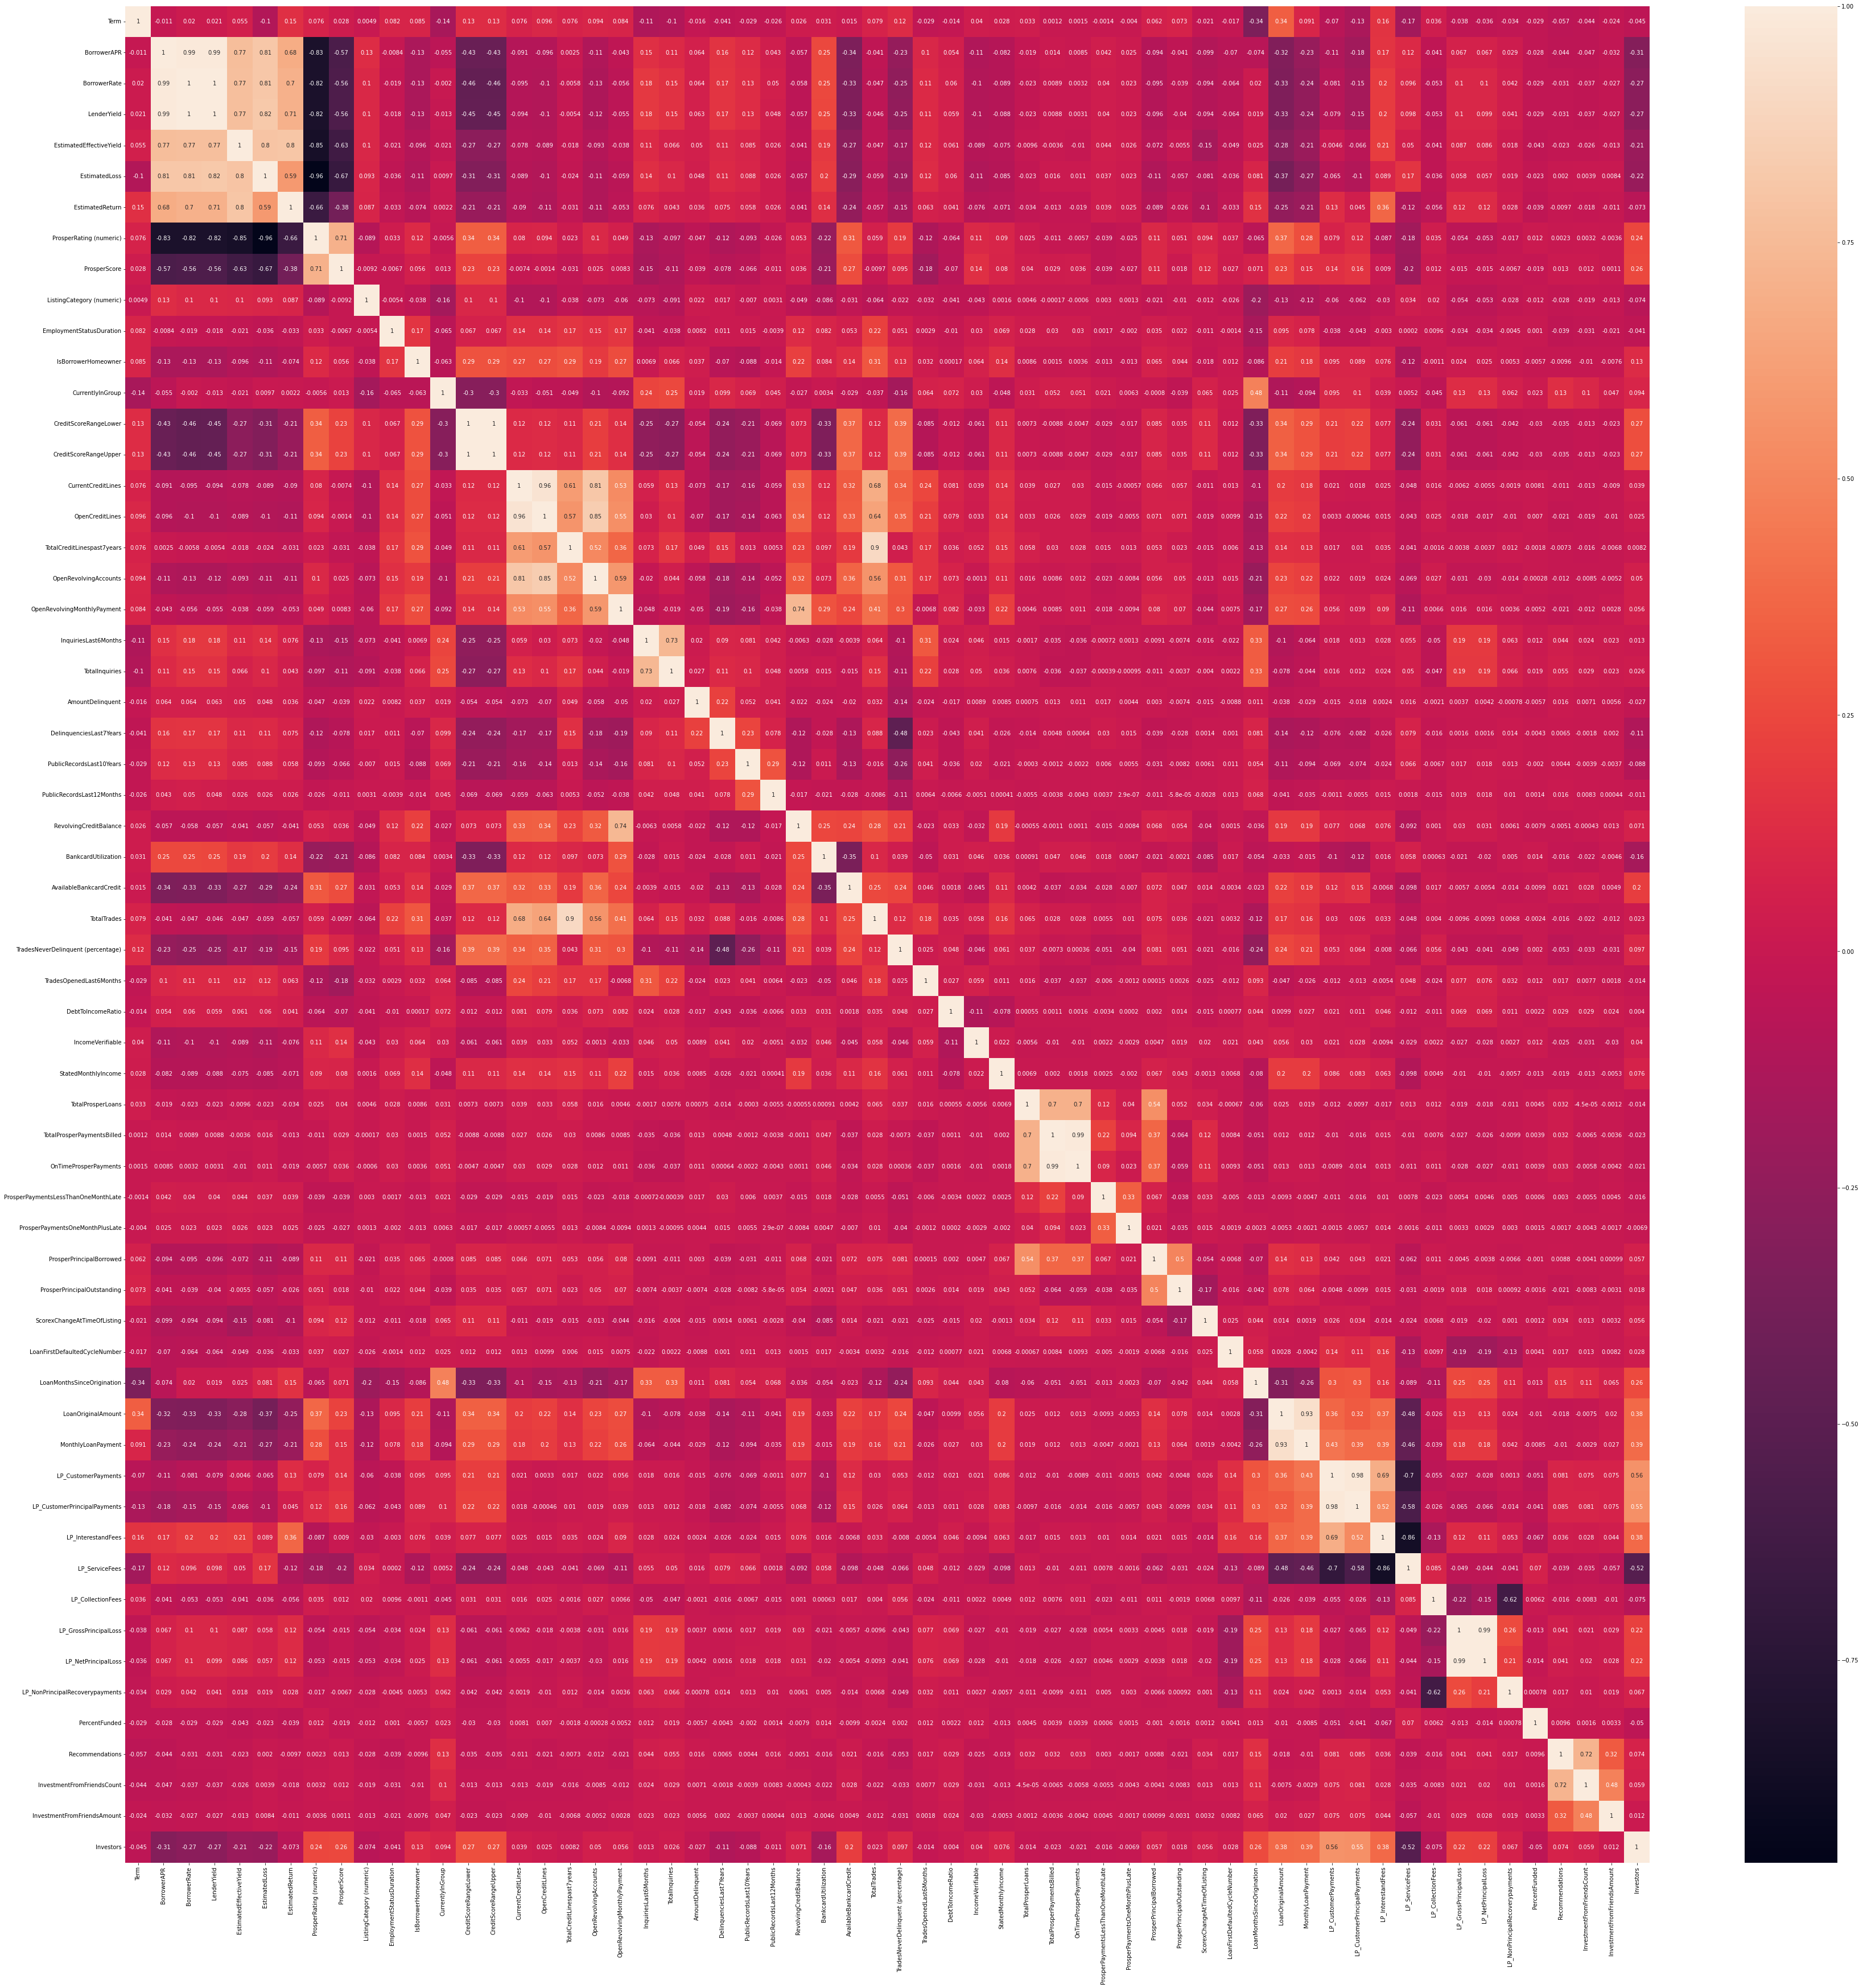

In [29]:
plt.figure(figsize=(60,60)) 
# to adjust the figure size
sns.heatmap(df_train.corr(),annot = True)
# annotate wrote the values on the plot (on the squares)
plt.show()

In [30]:
# removing features that are highly correlated
def correlation(df, threshold):
    col_corr= set() # set of all the names of the correlated columns
    corr_matrix= df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [36]:
X = df_train.copy()
y = X.pop("BorrowerRate")
X2 = df_train2.copy()
y2 = X2.pop("LoanStatus")

In [37]:
corr_features= correlation(X,0.8)
corr_features2= correlation(X2,0.8)
print("1", corr_features)
print("2",corr_features2)

1 {'CreditScoreRangeUpper', 'OpenRevolvingAccounts', 'ProsperRating (numeric)', 'EstimatedLoss', 'OnTimeProsperPayments', 'LP_ServiceFees', 'LenderYield', 'LP_CustomerPrincipalPayments', 'EstimatedReturn', 'LP_NetPrincipalLoss', 'OpenCreditLines', 'MonthlyLoanPayment', 'TotalTrades'}
2 {'CreditScoreRangeUpper', 'OpenRevolvingAccounts', 'ProsperRating (numeric)', 'OnTimeProsperPayments', 'LP_ServiceFees', 'BorrowerRate', 'LenderYield', 'LP_CustomerPrincipalPayments', 'LP_NetPrincipalLoss', 'OpenCreditLines', 'MonthlyLoanPayment', 'TotalTrades'}


In [38]:
X=X.drop(corr_features,axis=1)

In [39]:
X2=X2.drop(corr_features2,axis=1)

In [40]:
X.columns

Index(['ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
       'ClosedDate', 'BorrowerAPR', 'EstimatedEffectiveYield',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'CreditScoreRangeLower', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'ProsperPayment

# Creating Features

In [41]:
from datetime import datetime
def extract_date_components(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    df[column_name+'Year'] = df[column_name].dt.year
    df[column_name+'Month'] = df[column_name].dt.month
    df[column_name+'Day'] = df[column_name].dt.day
    df = df.drop([column_name], axis=1)
    return df

In [42]:
X= extract_date_components(X, "ListingCreationDate")
X2=extract_date_components(X2, "ListingCreationDate")
X=extract_date_components(X, "LoanOriginationDate")
X2=extract_date_components(X2, "LoanOriginationDate")
X=extract_date_components(X, "DateCreditPulled")
X2=extract_date_components(X2, "DateCreditPulled")
X=extract_date_components(X, "FirstRecordedCreditLine")
X2=extract_date_components(X2, "FirstRecordedCreditLine")

In [43]:
## Grouping LoanOriginalAmount by CreditGrade
X["MeanLoanAmount"] = (
    X.groupby("CreditGrade") 
    ["LoanOriginalAmount"]              
    .transform("mean")         
)
X2["MeanLoanAmount"] = (
    X2.groupby("CreditGrade") 
    ["LoanOriginalAmount"]              
    .transform("mean")         
)

X[["CreditGrade", "LoanOriginalAmount", "MeanLoanAmount"]].head(10)

,CreditGrade,LoanOriginalAmount,MeanLoanAmount
0,C,9425.0,8890.452148
1,C,10000.0,8890.452148
2,HR,3001.0,2453.612793
3,C,10000.0,8890.452148
4,C,15000.0,8890.452148
5,C,15000.0,8890.452148
6,C,3000.0,8890.452148
7,C,10000.0,8890.452148
8,C,10000.0,8890.452148
9,C,10000.0,8890.452148


# Establishing a baseline

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Train and score baseline model

# baseline = RandomForestRegressor(criterion="mae", random_state=0)
# baseline_score = cross_val_score(
#     baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
# )
# baseline_score = -1 * baseline_score.mean()

# print(f"MAE Baseline Score: {Y_pred_rf:.4}")

In [45]:
search_value = '2007-08-26 19:09:29.263000000'
columns_with_value = df_train2.columns[df_train2.eq(search_value).any()]

# Print the column names that contain the value
print("Column names containing the value '{}':".format(search_value))
print(columns_with_value)


Column names containing the value '2007-08-26 19:09:29.263000000':
Index(['ListingCreationDate'], dtype='object')


In [46]:
# df_train.select_dtypes(include=['object']).columns
pd.set_option('display.max_columns',None)
X.head()

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,EstimatedEffectiveYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CurrentCreditLines,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationQuarter,LP_CustomerPayments,LP_InterestandFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDateYear,ListingCreationDateMonth,ListingCreationDateDay,LoanOriginationDateYear,LoanOriginationDateMonth,LoanOriginationDateDay,DateCreditPulledYear,DateCreditPulledMonth,DateCreditPulledDay,FirstRecordedCreditLineYear,FirstRecordedCreditLineMonth,FirstRecordedCreditLineDay,MeanLoanAmount
0,C,36.0,Completed,2009-08-14 00:00:00,0.16516,0.168661,C,5.950067,0.0,CO,Other,Self-employed,2.000000,True,True,640.0,5.000000,12.0,24.0,3.0,3.0,472.00000,4.0,0.0,0.000000,0.000000,0.000000,1500.000000,0.810000,0.000000,0.17,"$25,000-49,999",True,3083.333252,1.4211,22.934345,0.613629,0.04854,8472.311523,2930.313965,-3.223214,16.268463,78.0,9425.0,Q3 2007,11396.139648,1971.140015,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0,2007,8,26,2007,9,12,2007,8,26,2001,10,11,8890.452148
1,C,36.0,Current,NaN,0.12016,0.079600,A,7.000000,2.0,CO,Professional,Employed,44.000000,False,False,680.0,14.000000,29.0,389.0,3.0,5.0,0.00000,0.0,1.0,0.000000,3989.000000,0.210000,10266.000000,1.000000,2.000000,0.18,"$50,000-74,999",True,6125.000000,1.4211,22.934345,0.613629,0.04854,8472.311523,2930.313965,-3.223214,16.268463,0.0,10000.0,Q1 2014,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2014,2,27,2014,3,3,2014,2,27,1996,3,18,8890.452148
2,HR,36.0,Completed,2009-12-17 00:00:00,0.28269,0.168661,C,5.950067,0.0,GA,Other,Not available,96.071579,False,True,480.0,10.317192,3.0,0.0,0.0,1.0,984.50708,0.0,0.0,0.015094,17598.707031,0.561309,11210.225586,0.885897,0.802327,0.06,Not displayed,True,2083.333252,1.4211,22.934345,0.613629,0.04854,8472.311523,2930.313965,-3.223214,16.268463,86.0,3001.0,Q1 2007,4186.629883,1185.630005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,2007,1,5,2007,1,17,2007,1,2,2002,7,27,2453.612793
3,C,36.0,Current,NaN,0.12528,0.084900,A,9.000000,16.0,GA,Skilled Labor,Employed,113.000000,True,False,800.0,5.000000,29.0,115.0,0.0,1.0,10056.00000,14.0,0.0,0.000000,1444.000000,0.040000,30754.000000,0.760000,0.000000,0.15,"$25,000-49,999",True,2875.000000,1.4211,22.934345,0.613629,0.04854,8472.311523,2930.313965,-3.223214,16.268463,16.0,10000.0,Q4 2012,5143.200195,1052.109985,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0,2012,10,22,2012,11,1,2012,10,22,1983,2,28,8890.452148
4,C,36.0,Current,NaN,0.24614,0.183160,D,4.000000,2.0,MN,Executive,Employed,44.000000,True,False,680.0,19.000000,49.0,220.0,1.0,9.0,0.00000,0.0,0.0,0.000000,6193.000000,0.810000,695.000000,0.950000,2.000000,0.26,"$100,000+",True,9583.333008,1.0000,11.000000,0.000000,0.00000,11000.000000,9947.900391,-3.223214,16.268463,6.0,15000.0,Q3 2013,2819.850098,1256.630005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,2013,9,14,2013,9,20,2013,9,14,2004,2,20,8890.452148


# Mutual information

In [47]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    x = X.copy()
    for colname in x.select_dtypes(["object", "category"]):
        x[colname], _ = x[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[:20]

BorrowerAPR                           5.717780
EstimatedEffectiveYield               4.461518
LoanMonthsSinceOrigination            1.787915
LP_CustomerPayments                   1.533035
LP_InterestandFees                    1.058199
ProsperScore                          0.957467
CreditScoreRangeLower                 0.550536
LoanOriginalAmount                    0.494579
Investors                             0.440913
MeanLoanAmount                        0.395682
BankcardUtilization                   0.379400
Term                                  0.372729
ListingCategory (numeric)             0.356048
AvailableBankcardCredit               0.350325
TradesNeverDelinquent (percentage)    0.259158
EmploymentStatusDuration              0.249798
RevolvingCreditBalance                0.245781
DebtToIncomeRatio                     0.234106
CurrentCreditLines                    0.217356
OpenRevolvingMonthlyPayment           0.189341
Name: MI Scores, dtype: float64

In [48]:
mi_scores2 = make_mi_scores(X2, y2)
mi_scores2[:20]

LoanCurrentDaysDelinquent          0.571079
LP_GrossPrincipalLoss              0.479052
LoanFirstDefaultedCycleNumber      0.473857
ClosedDate                         0.203239
LP_CustomerPayments                0.130251
BorrowerAPR                        0.059126
LP_NonPrincipalRecoverypayments    0.049346
CreditScoreRangeLower              0.040511
EstimatedReturn                    0.038169
LP_CollectionFees                  0.038109
EstimatedEffectiveYield            0.036634
EstimatedLoss                      0.034645
CreditGrade                        0.026320
LoanOriginationQuarter             0.025309
LoanOriginationDateYear            0.025116
MeanLoanAmount                     0.024867
LoanMonthsSinceOrigination         0.024525
ListingCreationDateYear            0.024494
DateCreditPulledYear               0.023100
ProsperRating (Alpha)              0.021839
Name: MI Scores, dtype: float64

In [49]:
cols_to_drop = X.columns[mi_scores < 0.1]

In [50]:
cols_to_drop

Index(['ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination', 'LoanOriginalAmount',
       'LoanOriginationQuarter', 'LP_CustomerPayments', 'LP_InterestandFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount',
       'Investors', 'ListingCreationDateYear', 'ListingCreationDateMonth',
       'ListingCreationDateDay', 'LoanOriginationDateYear',
       'LoanOriginationDateMonth', 'LoanOriginationDateDay',
       'DateCreditPulledYear', 'DateCreditPulledMonth', 'DateCreditPulledDay',
       'FirstRecordedCreditLineYear', 'FirstRecordedCreditLineMonth',
       'FirstRecordedCreditLineDay', 'MeanLoanAmount'],
      dtype='object')

In [51]:
X = X.drop(cols_to_drop, axis=1)

In [52]:
cols_to_drop2 = X2.columns[mi_scores2 < 0.05]

In [53]:
cols_to_drop2

Index(['EstimatedReturn', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'CreditScoreRangeLower', 'CurrentCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'S

In [54]:
X2 = X2.drop(cols_to_drop2, axis=1)

In [55]:
X2.head()

,CreditGrade,Term,ClosedDate,BorrowerAPR,EstimatedEffectiveYield,EstimatedLoss
0,C,36.0,2009-08-14 00:00:00,0.16516,0.168661,0.080306
2,HR,36.0,2009-12-17 00:00:00,0.28269,0.168661,0.080306
11,C,36.0,2008-01-07 00:00:00,0.15033,0.168661,0.080306
12,C,36.0,NaN,0.17969,0.126400,0.052400
15,C,36.0,2012-12-19 00:00:00,0.35797,0.289600,0.165000


## Plotting mutual information

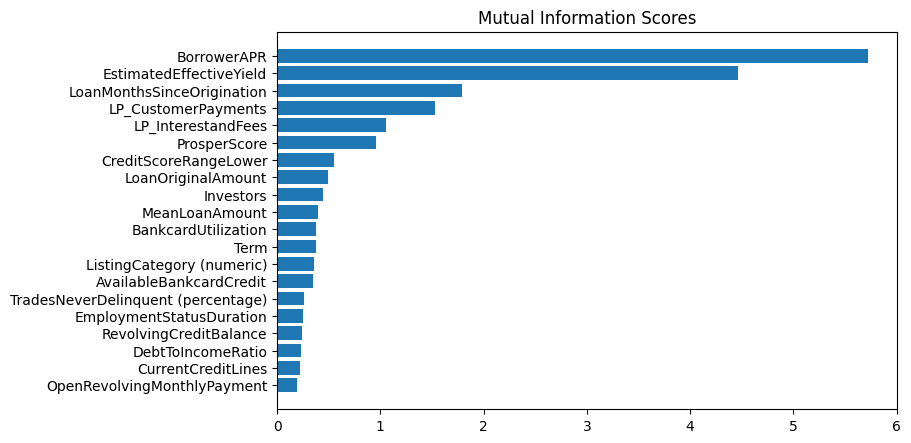

In [56]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

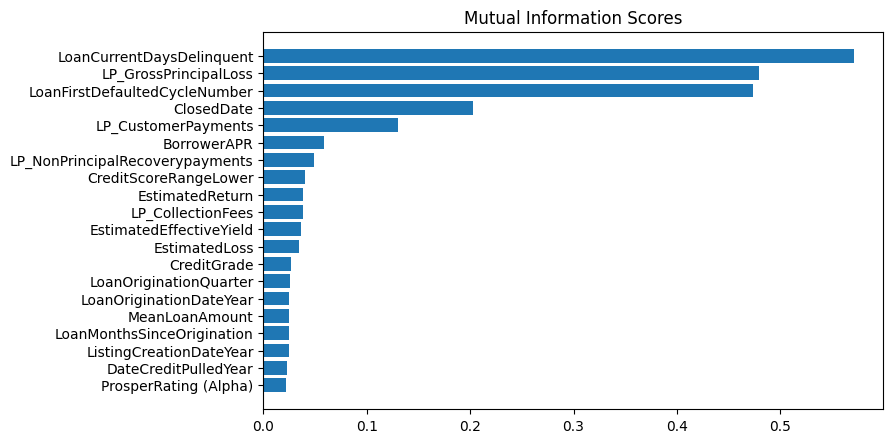

In [57]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores2.head(20))

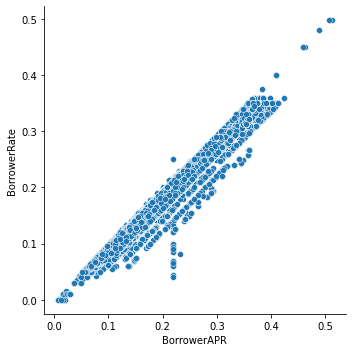

In [58]:
# plot the feature with the highest score with the target 
sns.relplot(x="BorrowerAPR", y="BorrowerRate", data=df_train);

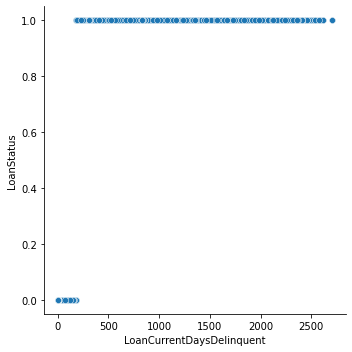

In [59]:
# plot the feature with the highest score with the target 
sns.relplot(x="LoanCurrentDaysDelinquent", y="LoanStatus", data=df_train2);

# Principal Component Analysis

In [60]:
##pca on only numerical columns
# x contains numerical + categorical 
# xcat contains only categorical 
# xnumerical contains only numerical
cat_cols2 = X2.select_dtypes(include=['category','object','boolean']).columns
xCategorical2= X2[cat_cols2].copy()
Numerical2=X2.select_dtypes(include=['float64','int64']).columns
xNumerical2= X2[Numerical2].copy()

# X2= X2.drop(cat_cols2,axis=1)
cat_cols = X.select_dtypes(include=['category','object','boolean']).columns
xCategorical= X[cat_cols].copy()
Numerical=X.select_dtypes(include=['float32','int32']).columns
xNumerical= X[Numerical].copy()
# X= X.drop(cat_cols,axis=1)

In [61]:

# Standardize
X_scaled = (xNumerical - xNumerical.mean(axis=0)) / xNumerical.std(axis=0)


In [62]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
# scaler = StandardScaler()
# Apply Standard Scaling to the numeric columns

# df_train2[features2] = scaler.fit_transform(df_train2[features2])

# Standardize
X_scaled2 = (xNumerical2 - xNumerical2.mean(axis=0)) / xNumerical2.std(axis=0)


In [63]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head(10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,-0.995420,-2.121980,0.622591,-0.008263,-0.818768,-0.554394,0.306033,-0.407523,0.084530,-0.450743,0.404653,-0.511227,0.206525,0.326319,-0.887905,-0.201296,-0.171298,0.270548,0.031866,-0.573717,-0.664551,0.903726,0.049105,-0.250264,0.671623,-0.354611,0.443845
1,1.158391,-0.629674,1.825495,0.314609,-0.609500,-0.197722,-0.051023,0.675261,-0.149211,0.211147,-0.503634,-0.676405,0.000192,-0.120544,0.905600,0.576276,0.465199,-0.634252,-0.032917,-0.230390,-0.522781,0.868037,-0.172358,-0.224426,0.560244,0.153834,0.037183
2,-1.515469,-0.619291,-0.776081,-0.262891,-0.429677,-1.553336,0.201070,-0.127415,-0.197930,0.020073,-0.351409,-0.540263,0.898018,-0.220032,-0.406133,1.001324,-0.349910,0.576530,2.242042,0.735566,-0.501445,1.160659,0.164548,-0.225438,-0.054127,-0.304320,-0.343299
3,1.258813,-3.291522,0.766362,0.579844,1.261882,2.399663,-0.035601,-1.432187,1.040380,-1.272699,-0.602637,1.447843,-0.780377,-1.152971,0.648873,0.086856,-0.172053,0.103512,-0.286575,-0.193666,0.381719,-0.138226,0.036863,-0.082042,0.096093,0.160297,-0.040418
4,-0.028508,1.820885,0.593262,-1.916471,-0.420493,0.437201,0.181242,-0.051481,-0.586753,0.625556,-0.869670,-1.255093,-0.294050,0.189328,1.547636,-0.904128,-0.039069,0.202221,0.072415,-0.125095,0.200958,0.060749,0.248091,-0.054933,-0.419935,-0.309378,-0.286089
5,5.185015,1.205457,0.548517,0.286321,1.171841,0.997855,0.161868,0.157233,-0.522322,-0.453149,1.087104,-0.542255,-0.998675,-0.564975,-1.743270,0.055776,0.082597,-0.073479,1.800100,0.613076,0.310795,-0.561234,-0.137514,-0.042062,0.241963,0.383442,0.141832
6,-1.814502,0.246629,-1.931503,-0.427344,-0.039219,0.273760,0.018715,-0.175639,-0.462191,-0.075277,-0.665014,0.059705,1.081528,0.566396,-0.806750,-0.714451,-0.196119,0.367846,0.169621,-0.817319,0.976033,0.201598,-0.161849,0.307163,0.192478,-0.223076,-0.395490
7,-1.643464,-0.923290,0.956178,-0.035265,-0.919566,-0.112595,0.027470,0.361820,0.655395,-0.195812,0.447748,0.812137,0.620375,0.367608,-0.904780,-0.720420,0.643703,-0.659103,-0.363201,-0.853457,-0.078582,0.718690,-0.190286,0.384740,-0.637273,0.235653,-0.240379
8,4.222941,-1.438965,2.070898,0.526020,-0.200245,1.916234,-0.081898,0.139001,-0.140523,-0.226691,-1.118596,1.538170,0.850382,-0.482959,-0.309217,-0.106152,-0.020591,-0.081257,0.805627,0.797098,0.993799,-0.209885,-0.236735,0.162456,-0.271916,-0.137171,-0.443664
9,4.485081,-1.700699,2.254994,0.630591,-0.040715,1.716326,-0.076106,0.098588,-0.136386,-0.193093,-1.116754,1.648468,0.640201,-0.595520,-0.238148,0.031447,-0.063446,-0.025435,1.097960,0.821997,0.556977,-0.755667,-0.309243,0.276071,-0.275376,-0.216280,-0.383896


In [64]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=xNumerical.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
Term,0.075520,0.030739,-0.158602,-0.003909,0.050322,0.210600,-0.121308,0.121859,-0.172941,0.495295,0.626702,0.072715,-0.360145,-0.103142,-0.144642,0.175623,-0.054912,0.048823,0.050636,-0.033031,0.075438,0.086277,-0.014118,-0.048976,-0.006180,0.012998,-0.036907
BorrowerAPR,-0.350251,0.256423,-0.226270,-0.069509,-0.060765,0.166833,-0.034772,-0.011787,0.096755,-0.062841,-0.001164,-0.010529,0.010801,0.024119,-0.117036,-0.058510,0.012105,0.026274,0.233677,0.059757,-0.275963,-0.280590,-0.056591,-0.090220,0.010477,0.366052,-0.576265
EstimatedEffectiveYield,-0.312566,0.245566,-0.256103,-0.090520,-0.121883,0.265440,-0.037598,0.024030,0.089653,-0.058596,0.084499,-0.065467,0.067257,0.087491,-0.194764,-0.063246,0.026301,-0.002724,0.065129,0.020247,-0.150803,-0.291991,-0.017131,0.202589,-0.061786,-0.404791,0.530608
ProsperScore,0.268826,-0.268375,0.188756,0.107224,0.163600,-0.205011,0.005943,-0.041449,0.004244,0.034446,0.001890,0.113105,-0.215532,-0.115430,0.072876,0.141090,-0.043945,0.057246,0.299766,0.025547,-0.447921,-0.559676,-0.074338,0.116487,-0.003555,-0.081143,0.061277
ListingCategory (numeric),-0.037163,-0.067034,-0.122714,-0.021162,-0.002391,0.375888,-0.061285,-0.076426,0.461365,-0.150801,-0.215657,0.379649,-0.402419,-0.323273,0.294837,0.089043,-0.000580,-0.020830,0.057428,0.044463,0.119294,0.132818,-0.002225,0.001910,-0.000221,-0.028130,0.042430
EmploymentStatusDuration,0.081389,0.123333,-0.060815,0.049076,0.215044,0.111266,-0.090162,0.043557,-0.127333,0.322519,-0.224640,0.686317,0.479313,0.111176,-0.057479,0.042170,-0.056295,0.069038,0.063459,0.005065,-0.028802,0.012879,0.009161,0.006256,-0.023904,-0.028098,0.005434
CreditScoreRangeLower,0.333173,-0.148599,-0.040387,-0.020066,-0.074465,0.352735,-0.026543,0.057094,0.060243,-0.033583,0.066987,0.021850,0.071706,0.088011,0.004820,-0.184441,0.046964,-0.092487,-0.573947,-0.157770,0.118007,-0.410693,-0.183428,0.203633,-0.031541,0.003894,-0.224757
CurrentCreditLines,0.260286,0.376603,0.085802,0.027619,-0.026035,0.113468,-0.028320,0.034831,-0.187769,0.041642,-0.152807,-0.167569,-0.069220,-0.101448,0.139346,-0.176973,0.003840,0.016467,0.269553,-0.006063,-0.060238,0.259086,-0.375561,0.399287,0.053171,-0.317756,-0.253930
TotalCreditLinespast7years,0.140384,0.339682,0.144878,0.107362,0.217336,0.249320,-0.049145,-0.056344,-0.230008,0.073076,-0.184584,-0.128837,-0.197057,-0.071896,0.130555,-0.375439,0.020675,-0.017776,-0.021040,-0.178629,-0.040048,-0.179111,0.358454,-0.432324,0.036296,0.038201,0.146779
OpenRevolvingMonthlyPayment,0.277377,0.377202,-0.131984,-0.041312,0.168357,-0.110206,0.048809,-0.003465,0.101589,-0.164120,0.035272,0.015338,-0.026033,-0.082225,-0.135584,0.129735,-0.000515,-0.015738,-0.095012,-0.161180,-0.104825,0.072491,-0.170737,0.219193,0.177312,0.586201,0.365537


In [65]:
pca2 = PCA()
X_pca2 = pca2.fit_transform(X_scaled2)

# Convert to dataframe
component_names2 = [f"PC{i+1}" for i in range(X_pca2.shape[1])]
X_pca2 = pd.DataFrame(X_pca2, columns=component_names2)

X_pca2.head(10)

,PC1,PC2,PC3,PC4
0,-0.555780,0.067043,-0.358452,0.260045
1,0.219713,0.185151,0.374116,-0.537940
2,-0.653632,0.052140,-0.450888,0.360735
3,-1.297170,0.026132,0.190884,-0.239326
4,3.185205,0.445535,-0.446617,0.193259
5,-0.774446,0.033740,-0.565014,0.485053
6,-0.227715,0.117008,-0.048546,-0.077536
7,1.047181,0.230754,-0.126242,-0.141185
8,2.123289,-2.770169,0.233364,0.272543
9,-2.857731,-0.063347,0.543483,-0.172730


In [66]:
loadings2 = pd.DataFrame(
    pca2.components_.T,  # transpose the matrix of loadings
    columns=component_names2,  # so the columns are the principal components
    index=xNumerical2.columns,  # and the rows are the original features
)
loadings2

,PC1,PC2,PC3,PC4
Term,0.104716,-0.966192,0.192654,0.135620
BorrowerAPR,0.579829,0.088309,0.547735,-0.596646
EstimatedEffectiveYield,0.560165,-0.125901,-0.793311,-0.202536
EstimatedLoss,0.582279,0.206940,0.183107,0.764591


In [67]:
mi_scores = make_mi_scores(X_pca, y)
mi_scores

PC1     0.500883
PC4     0.328940
PC27    0.284432
PC3     0.284222
PC2     0.279392
PC7     0.257882
PC26    0.226498
PC10    0.220693
PC11    0.219977
PC22    0.219374
PC6     0.203931
PC8     0.190453
PC18    0.187334
PC17    0.181881
PC19    0.180683
PC21    0.180130
PC9     0.172770
PC14    0.153797
PC15    0.152806
PC5     0.151145
PC13    0.150268
PC20    0.141075
PC16    0.134363
PC24    0.132075
PC25    0.130658
PC23    0.128561
PC12    0.124801
Name: MI Scores, dtype: float64

In [68]:
mi_scores2 = make_mi_scores(X_pca2, y2)
mi_scores2

PC1    0.065921
PC3    0.063411
PC2    0.062493
PC4    0.059173
Name: MI Scores, dtype: float64

In [69]:
# creating new features using PCA components
xNumerical = xNumerical.join(X_pca)
# score = score_dataset(X, y)
# print(f"Your score: {score:.5f} RMSLE")

In [70]:
# creating new features using PCA components

xNumerical2 = xNumerical2.join(X_pca2)
# score = score_dataset(X, y)
# print(f"Your score: {score:.5f} RMSLE")

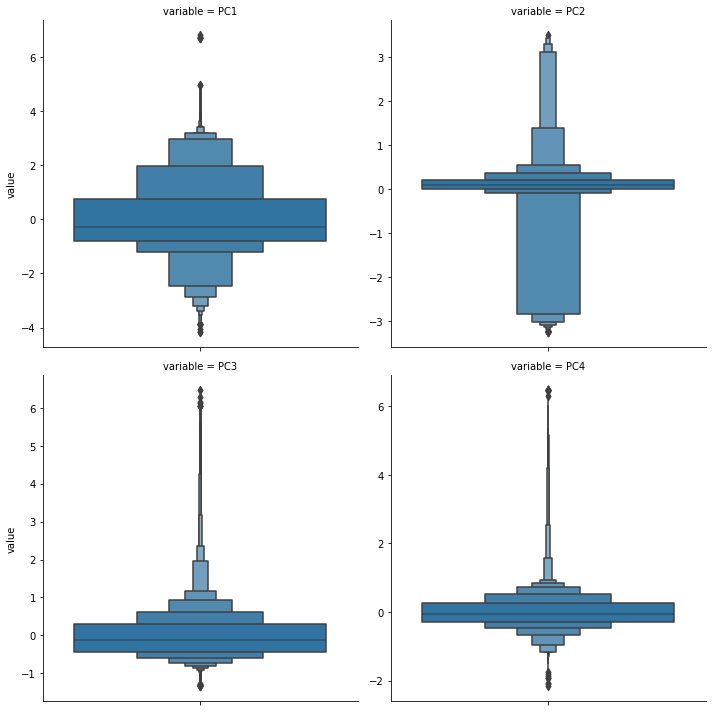

In [71]:
sns.catplot(
    y="value",
    col="variable",
    data=X_pca2.melt(),
    kind='boxen',
    sharey=False,
    col_wrap=2,
);

# Label encoding on Categorical Columns

In [72]:
le = LabelEncoder()
for col in xCategorical:
            xCategorical[col] = le.fit_transform(xCategorical[col])

In [73]:
le = LabelEncoder()
for col in xCategorical2:
            xCategorical2[col] = le.fit_transform(xCategorical2[col])

# Concatenate xcategorical with xNumerical

In [115]:
concatenated_features= xNumerical.join(xCategorical)
concatenated_features=concatenated_features.join(df_train["BorrowerRate"])

Term                                   0
BorrowerAPR                            0
EstimatedEffectiveYield                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CurrentCreditLines                     0
TotalCreditLinespast7years             0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLast12Months              0
RevolvingCreditBalance                 0
BankcardUtilization                    0
AvailableBankcardCredit                0
TradesNeverDelinquent (percentage)     0
TradesOpenedLast6Months                0
DebtToIncomeRatio                      0
StatedMonthlyIncome                    0
TotalProsperLoans                      0
TotalProsperPaym

In [104]:
concatenated_features2= xNumerical2.join(xCategorical2)
concatenated_features2=concatenated_features2.join(df_train2["LoanStatus"])

# checking for imbalance in our target variables

In [105]:
class_counts = df_train['BorrowerRate'].value_counts(normalize=True) * 100
if (class_counts.max() / class_counts.min()) > 3:
    print("The dataset is imbalanced.")
else:
    print("The dataset is not imbalanced.")

The dataset is imbalanced.


<AxesSubplot: >

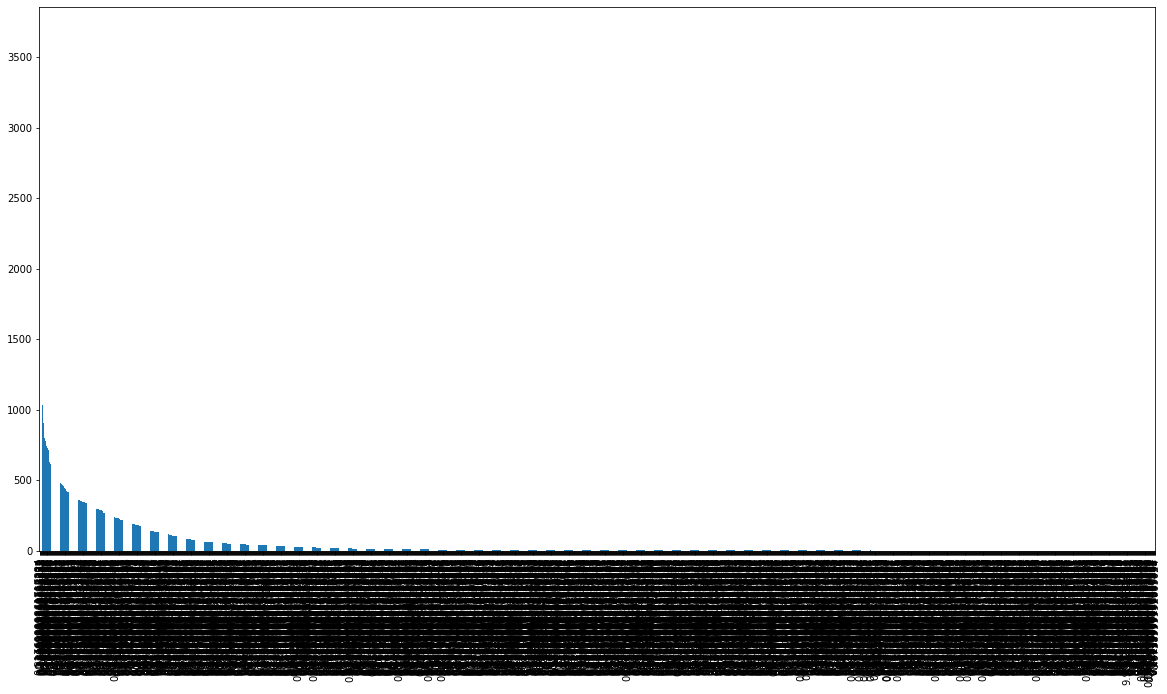

In [111]:
plt.figure(figsize=(20,10))
concatenated_features['BorrowerRate'].value_counts().plot.bar()

<AxesSubplot: >

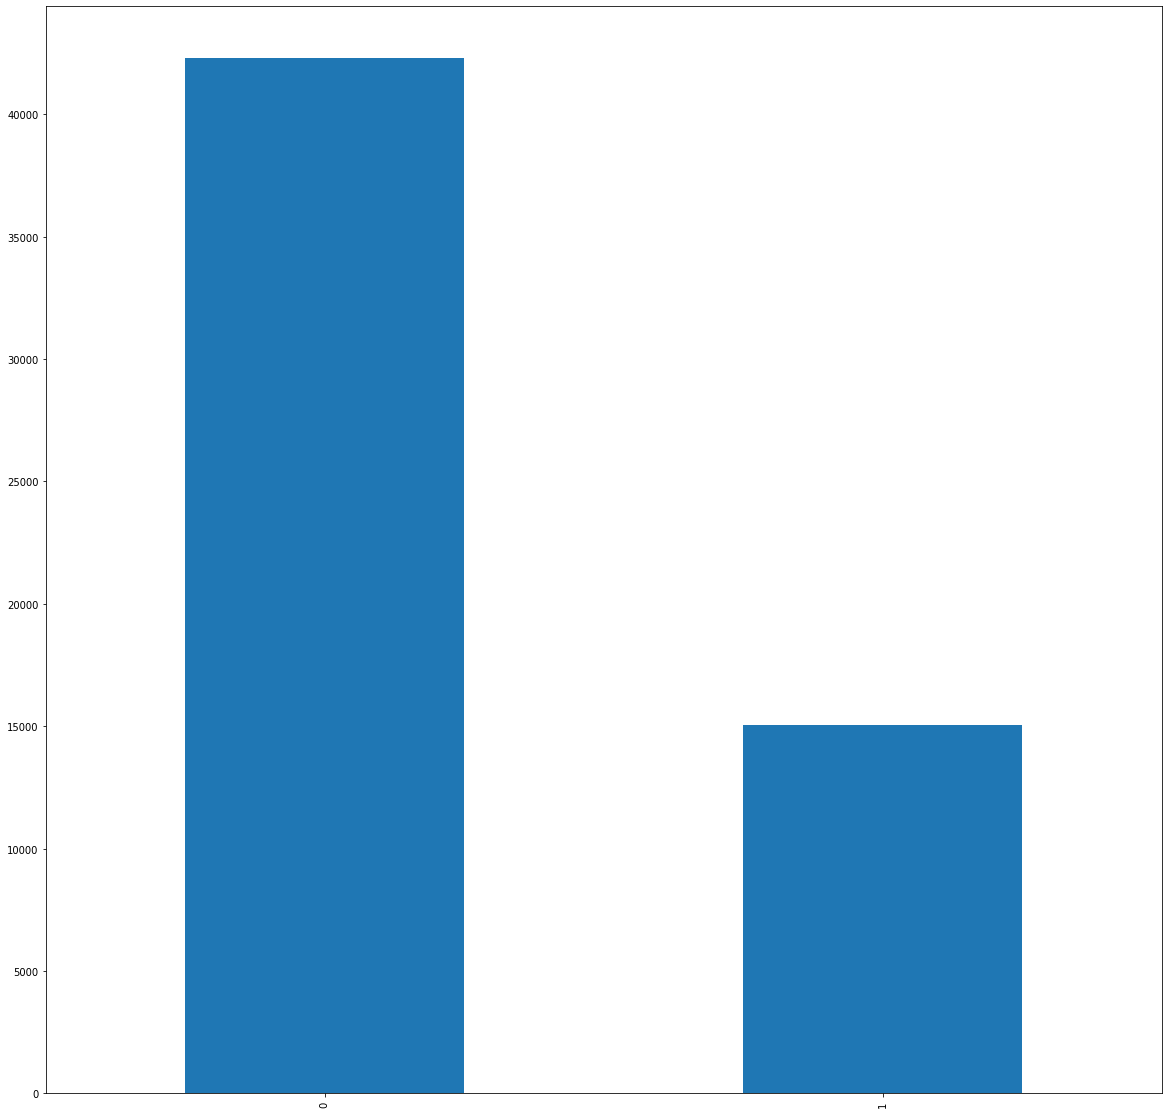

In [112]:
plt.figure(figsize=(20,20))
concatenated_features2['LoanStatus'].value_counts().plot.bar()

In [108]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [119]:
from imblearn.over_sampling import SMOTE
from collections import Counter
df= concatenated_features.copy()

df['BorrowerRate'] = pd.cut(df['BorrowerRate'], bins=7, labels=[0, 1,2,3,4,5,6])
class_counts = df['BorrowerRate'].value_counts(normalize=True) * 100

# determine if dataset is imbalanced
if (class_counts.max() / class_counts.min()) > 2:
    print("The dataset is imbalanced.")
    x=df.drop('BorrowerRate',axis=1)
    Y = df['BorrowerRate']

    # define the SMOTE model
    smote = SMOTE()

    # fit and apply the transform
    X_smote, y_smote = smote.fit_resample(x, Y)

    # summarize class distribution
    print("After SMOTE:", Counter(y_smote))
else:
    print("The dataset is not imbalanced.")

print(class_counts)

The dataset is imbalanced.
After SMOTE: Counter({2: 37915, 1: 37915, 3: 37915, 0: 37915, 4: 37915, 5: 37915, 6: 37915})
2    33.277162
1    27.364245
3    21.262628
4    15.892993
0     2.159966
5     0.037740
6     0.005266
Name: BorrowerRate, dtype: float64


<AxesSubplot: >

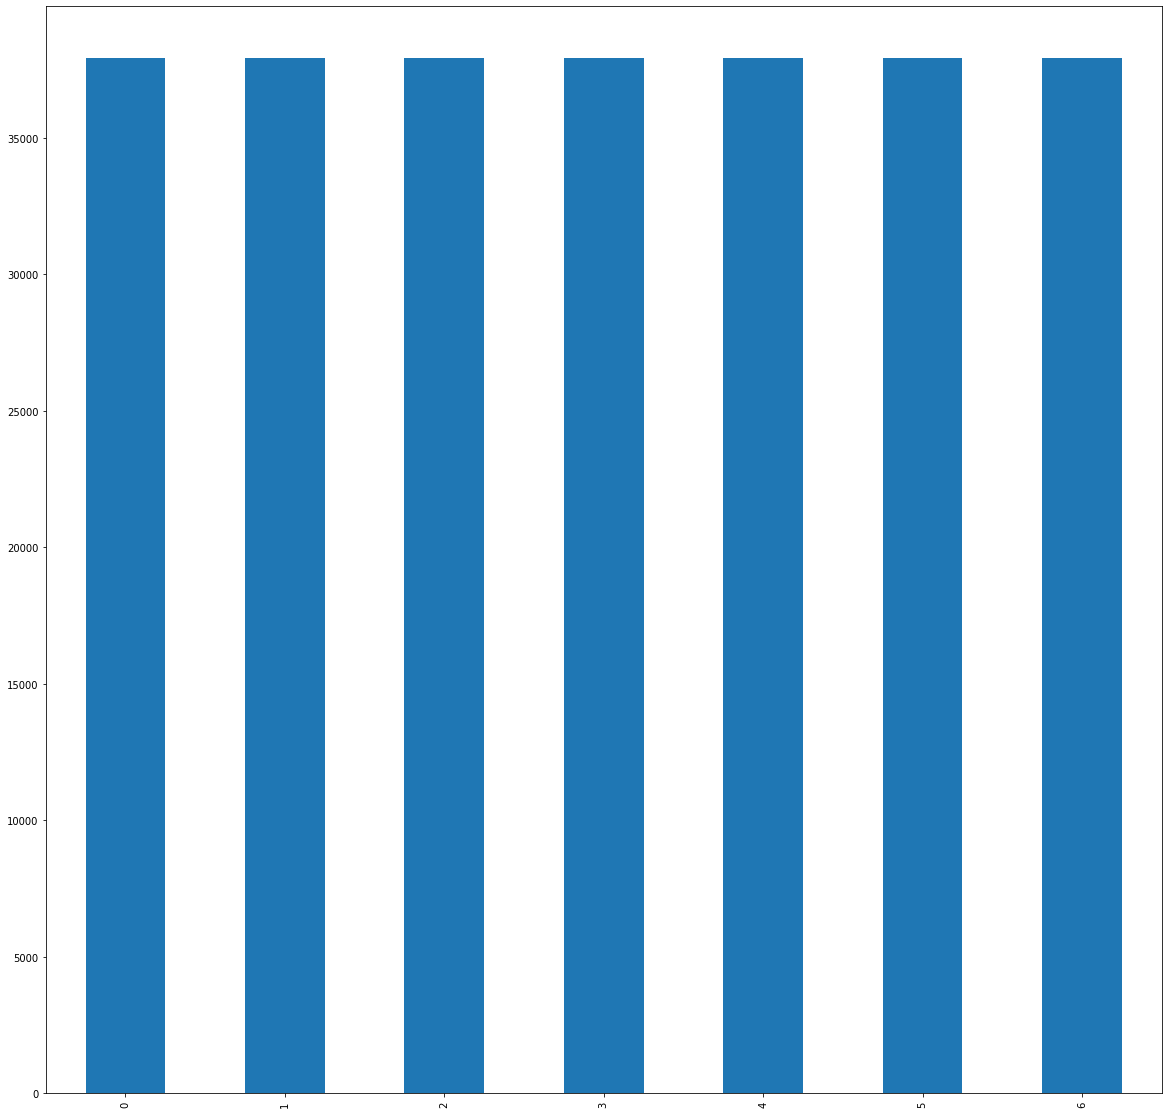

In [120]:
plt.figure(figsize=(20,20))
y_smote.value_counts().plot.bar()